# 1. 데이터 불러오기 + 정리

데이터 정리

In [163]:
import pandas as pd

# 불필요 컬럼 삭제
df = pd.read_csv('./final_0213.csv')
df = df.drop(['Unnamed: 0', '제목','에피소드'], axis=1)

# '구독자수' 컬럼의 따옴표 제거
df['구독자수'] = df['구독자수'].str.replace(",", "")
df['구독자수'] = pd.to_numeric(df['구독자수'], errors='coerce') # # '구독자수' 컬럼의 데이터를 숫자로 변환

# 출연자 삭제
raw_df = df.drop(['출연자'], axis=1)

raw_df

,회차,조회수,좋아요수,댓글수,재생시간(초),구독자수,term,시청률,직업,성별,나이,수상여부,인지도,날짜
0,40,881349,6186,224,314,0,1290,2.600,서비스,M,중년,Y,Y,2019-10-22
1,40,173,1,1,109,0,1290,2.600,서비스,M,청년,N,N,2019-10-22
2,41,593,4,1,394,0,1290,2.700,기타,F,중년,N,N,2019-10-29
3,41,593,4,1,394,0,1290,2.700,기타,F,청년,N,N,2019-10-29
4,41,593,4,1,394,0,1290,2.700,기타,F,노년,N,N,2019-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,228,204607,2509,414,983,894000,29,4.912,운동선수,M,청년,Y,Y,2024-01-17
831,228,81779,500,36,501,894000,29,4.912,운동선수,F,청년,Y,Y,2024-01-17
832,229,508075,5183,186,1044,897000,22,4.468,연예인,F,노년,Y,Y,2024-01-24
833,229,508075,5183,186,1044,897000,22,4.468,연예인,F,노년,Y,Y,2024-01-24


컬럼별 통계 정보

In [164]:
basic_stats = raw_df.describe()
basic_stats

,회차,조회수,좋아요수,댓글수,재생시간(초),구독자수,term,시청률
count,835.000000,8.350000e+02,8.350000e+02,835.000000,835.000000,835.000000,835.000000,835.000000
mean,132.117365,3.927220e+05,4.969881e+03,300.385629,607.853892,554568.071856,754.403593,4.335001
std,55.398518,1.255166e+06,3.975016e+04,1207.918716,373.321006,276970.116425,411.182723,1.064374
min,40.000000,2.600000e+01,0.000000e+00,0.000000,86.000000,0.000000,22.000000,2.009000
25%,84.500000,1.988700e+04,2.545000e+02,14.000000,251.500000,470000.000000,379.000000,3.659000
50%,132.000000,1.100850e+05,1.126000e+03,71.000000,586.000000,629519.000000,804.000000,4.422000
75%,178.000000,4.273520e+05,3.908500e+03,259.000000,931.500000,764019.000000,1136.500000,4.988000
max,229.000000,3.209352e+07,1.137001e+06,31668.000000,1514.000000,897000.000000,1290.000000,6.748000


결측치 확인

In [165]:
missing_values = raw_df.isnull().sum()
missing_values

회차         0
조회수        0
좋아요수       0
댓글수        0
재생시간(초)    0
구독자수       0
term       0
시청률        0
직업         0
성별         0
나이         0
수상여부       0
인지도        0
날짜         0
dtype: int64

# 2. EDA

## 1. 상관성 분석 & 시각화

In [166]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 패치
# Matlab 한글 시 실행 코드
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Windows version


In [167]:
edaDraft_df = raw_df.copy()

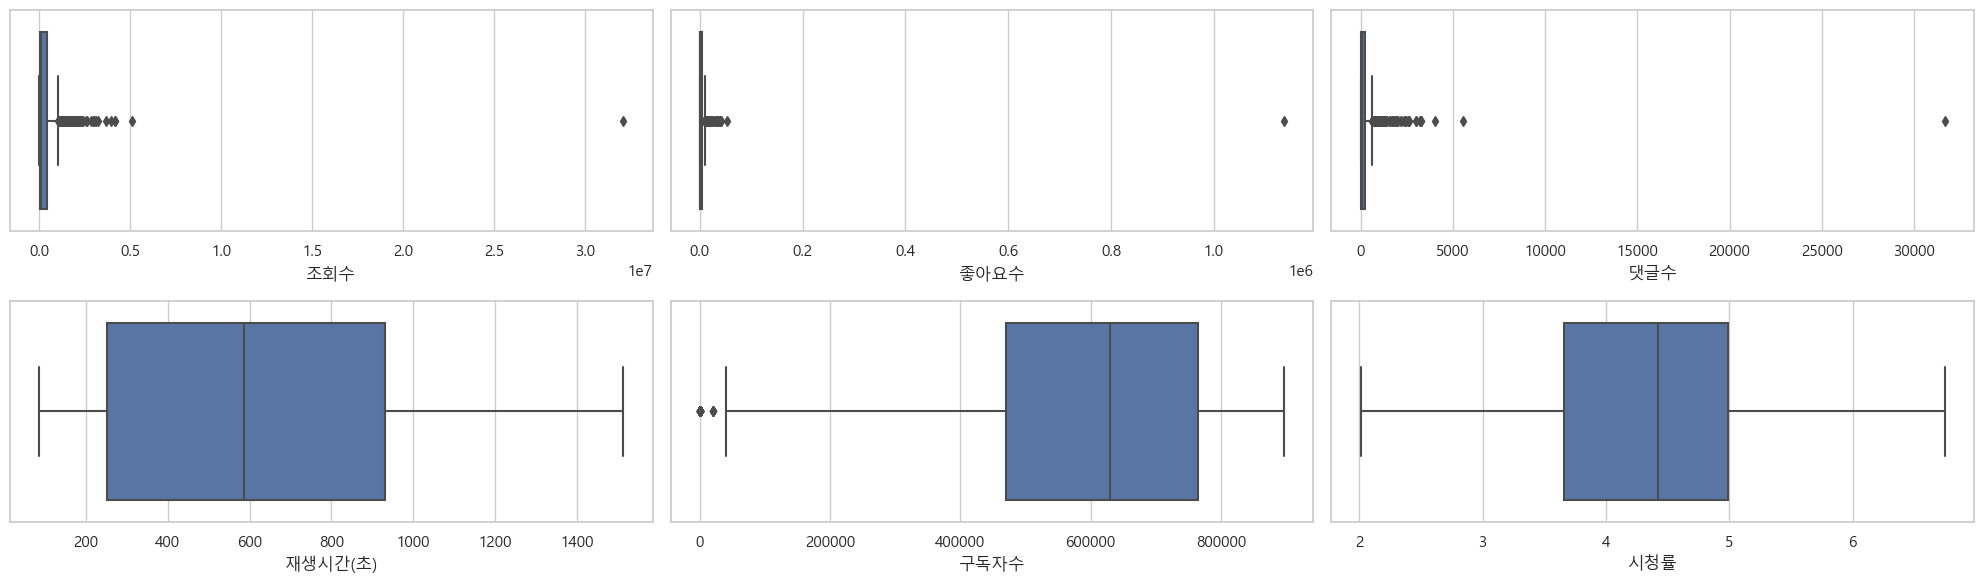

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# edaDraft_df의 일부 컬럼 선택 (예: 처음 6개 컬럼)
edaDraft_df = edaDraft_df.drop(['회차', 'term'], axis=1)
selected_columns = edaDraft_df.columns[:6]

# 선택된 변수에 대한 상자 그림
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6))

for i, column in enumerate(selected_columns):
    sns.boxplot(ax=axes[i//3, i%3], x=edaDraft_df[column])

plt.tight_layout()
plt.show()


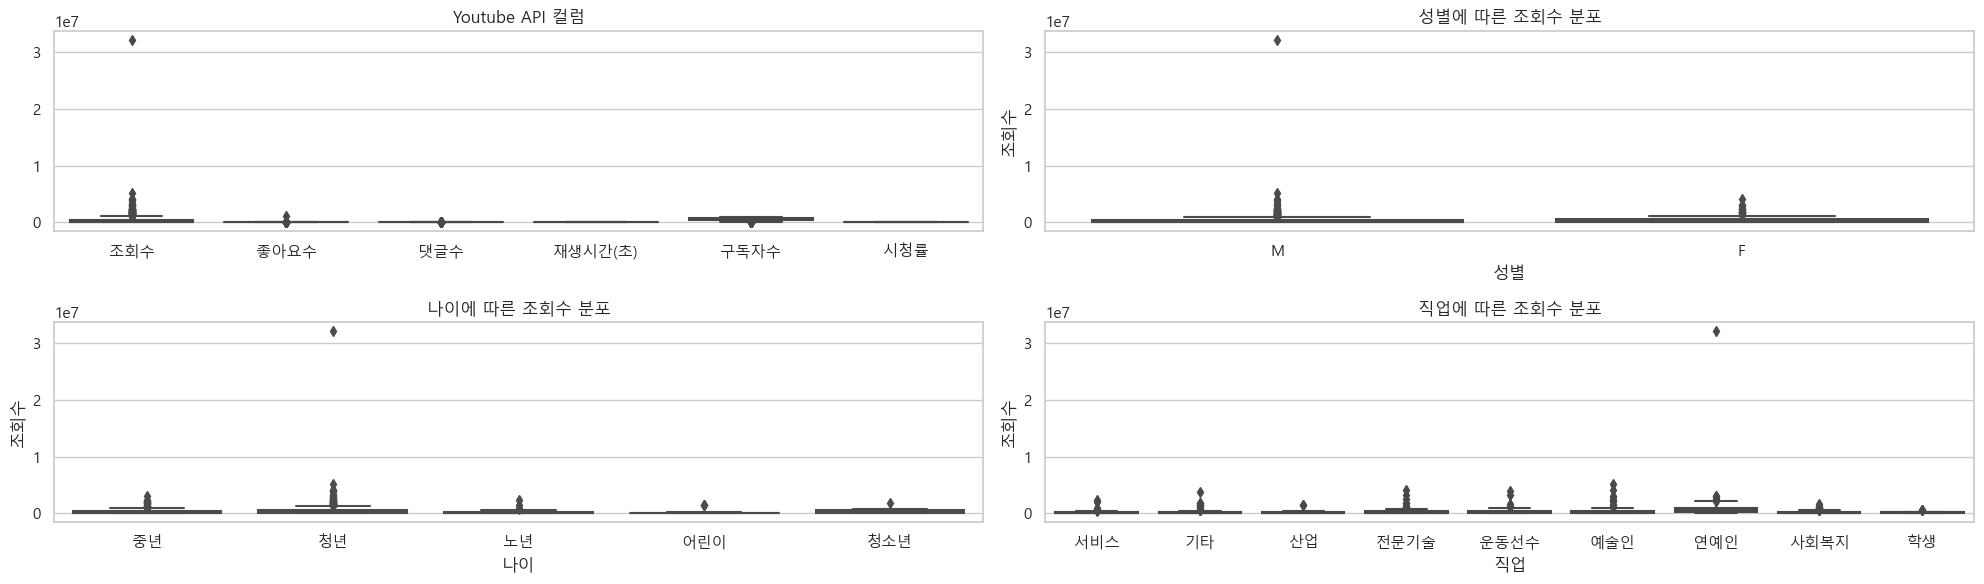

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# 4개의 차트를 한 번에 그리기 위한 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))

# 전체 데이터에 대한 박스플롯
sns.boxplot(data=edaDraft_df, ax=axes[0, 0])
axes[0, 0].set_title('Youtube API 컬럼')

# 성별에 따른 조회수 분포
sns.boxplot(x='성별', y='조회수', data=edaDraft_df, ax=axes[0, 1])
axes[0, 1].set_title('성별에 따른 조회수 분포')

# 나이에 따른 조회수 분포
sns.boxplot(x='나이', y='조회수', data=edaDraft_df, ax=axes[1, 0])
axes[1, 0].set_title('나이에 따른 조회수 분포')

# 직업에 따른 조회수 분포
sns.boxplot(x='직업', y='조회수', data=edaDraft_df, ax=axes[1, 1])
axes[1, 1].set_title('직업에 따른 조회수 분포')

# 레이아웃 조정
plt.tight_layout()
plt.show()


## 2. 이상치(Outliers) 확인 & 처리

라벨엔코딩

In [170]:
labelEnco_df = raw_df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in ['수상여부', '인지도', '성별', '직업']:
    le.fit(labelEnco_df[column])
    labelEnco_df[column] = le.transform(labelEnco_df[column])

# 나이
age = labelEnco_df['나이'].unique()
age_encoder = LabelEncoder()
labelEnco_df['나이'] = age_encoder.fit_transform(labelEnco_df['나이'])
print(f"나이(Label Encoding): {dict(zip(age, age_encoder.transform(age)))}")

나이(Label Encoding): {'중년': 2, '청년': 3, '노년': 0, '어린이': 1, '청소년': 4}


결측치 확인

In [171]:
missing_columns = labelEnco_df.columns[labelEnco_df.isnull().any()].tolist()
print("Columns with missing values:", missing_columns)
X_missing = labelEnco_df[missing_columns]

Columns with missing values: []


#### IQR (Interquartile Range)

- 데이터가 비정규 분포를 갖고있다고 판단하여 IQR (Interquartile Range)을 사용한 이상치 처리 선택

In [196]:
import pandas as pd

# 이상치를 확인할 데이터프레임 생성 (예: labelEnco_df)
# labelEnco_df = ...

# 이상치를 찾을 컬럼 선택
columns_to_check = ['조회수', '좋아요수', '댓글수']

# 결과를 저장할 데이터프레임 생성
result_df = pd.DataFrame(columns=['컬럼', '이상치', '값'])

# 각 컬럼별로 이상치 확인 및 큰 순서대로 상위 5개 저장
for column in columns_to_check:
    Q1 = labelEnco_df[column].quantile(0.25)
    Q3 = labelEnco_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = labelEnco_df[(labelEnco_df[column] < (Q1 - 1.5 * IQR)) | (labelEnco_df[column] > (Q3 + 1.5 * IQR))]
    
    # 큰 순서대로 상위 5개 저장
    top_outliers = outliers.sort_values(by=column, ascending=False).head(5)
    
    # 결과를 데이터프레임에 추가
    top_outliers['컬럼'] = column
    result_df = pd.concat([result_df, top_outliers[['컬럼', column]]])

# NaN 값을 0으로 채우기
result_df = result_df.fillna(0)

# 결과를 출력
result_df


,컬럼,이상치,값,조회수,좋아요수,댓글수
281,조회수,0,0,32093523.0,0.0,0.0
192,조회수,0,0,5096956.0,0.0,0.0
174,조회수,0,0,4163492.0,0.0,0.0
173,조회수,0,0,4163492.0,0.0,0.0
604,조회수,0,0,3916328.0,0.0,0.0
281,좋아요수,0,0,0.0,1137001.0,0.0
752,좋아요수,0,0,0.0,53231.0,0.0
604,좋아요수,0,0,0.0,41517.0,0.0
667,좋아요수,0,0,0.0,40462.0,0.0
283,좋아요수,0,0,0.0,39980.0,0.0


In [172]:
import pandas as pd

# 이상치를 확인할 데이터프레임 생성 (예: labelEnco_df)
# labelEnco_df = ...

# 이상치를 찾을 컬럼 선택
columns_to_check = ['조회수', '좋아요수', '댓글수']

# 각 컬럼별로 이상치 확인 및 큰 순서대로 상위 10개 출력
for column in columns_to_check:
    Q1 = labelEnco_df[column].quantile(0.25)
    Q3 = labelEnco_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = labelEnco_df[(labelEnco_df[column] < (Q1 - 1.5 * IQR)) | (labelEnco_df[column] > (Q3 + 1.5 * IQR))]
    
    # 큰 순서대로 상위 10개 출력
    top_outliers = outliers.sort_values(by=column, ascending=False).head(5)
    
    print(f"--- {column} 이상치 (상위 5개) ---")
    print(top_outliers[[column]])
    print("\n")


--- 조회수 이상치 (상위 5개) ---
          조회수
281  32093523
192   5096956
174   4163492
173   4163492
604   3916328


--- 좋아요수 이상치 (상위 5개) ---
        좋아요수
281  1137001
752    53231
604    41517
667    40462
283    39980


--- 댓글수 이상치 (상위 5개) ---
       댓글수
281  31668
152   5576
604   4017
629   3281
630   3281




In [173]:
# 281, 192, 174, 173, 604에 해당하는 값 출력
df.loc[[281, 192, 174, 173, 604]]

,출연자,회차,조회수,좋아요수,댓글수,재생시간(초),구독자수,term,시청률,직업,성별,나이,수상여부,인지도,날짜
281,BTS,99,32093523,1137001,31668,797,534870,1052,6.740,연예인,M,청년,Y,Y,2021-03-24
192,한상원,81,5096956,35070,1617,156,340000,1178,3.637,예술인,M,청년,N,Y,2020-11-18
174,곽유진,79,4163492,34143,2629,559,300000,1191,3.382,예술인,M,청년,Y,N,2020-11-04
173,김의주,79,4163492,34143,2629,559,300000,1191,3.382,전문기술,F,청년,Y,N,2020-11-04
604,손웅정,172,3916328,41517,4017,866,749074,421,6.603,운동선수,M,청년,N,Y,2022-12-14


In [174]:
import pandas as pd

# 이상치로 판단된 특정 행 삭제
eda_df = labelEnco_df.drop(index=281)

# 결과 확인
print(eda_df.head())

   회차     조회수  좋아요수  댓글수  재생시간(초)  구독자수  term  시청률  직업  성별  나이  수상여부  인지도  \
0  40  881349  6186  224      314     0  1290  2.6   3   1   2     1    1   
1  40     173     1    1      109     0  1290  2.6   3   1   3     0    0   
2  41     593     4    1      394     0  1290  2.7   0   0   2     0    0   
3  41     593     4    1      394     0  1290  2.7   0   0   3     0    0   
4  41     593     4    1      394     0  1290  2.7   0   0   0     0    0   

           날짜  
0  2019-10-22  
1  2019-10-22  
2  2019-10-29  
3  2019-10-29  
4  2019-10-29  


시청률 확인
- 정규 분포에 가까운 형태의 히스토그램과 QQ-plot은 '시청률'이 정규 분포에 가깝게 분포되어 있음을 시사합니다. 만약 정규 분포에서 벗어난다면, 이는 데이터가 특정한 패턴을 따르고 있다는 것을 의미할 수 있습니다.

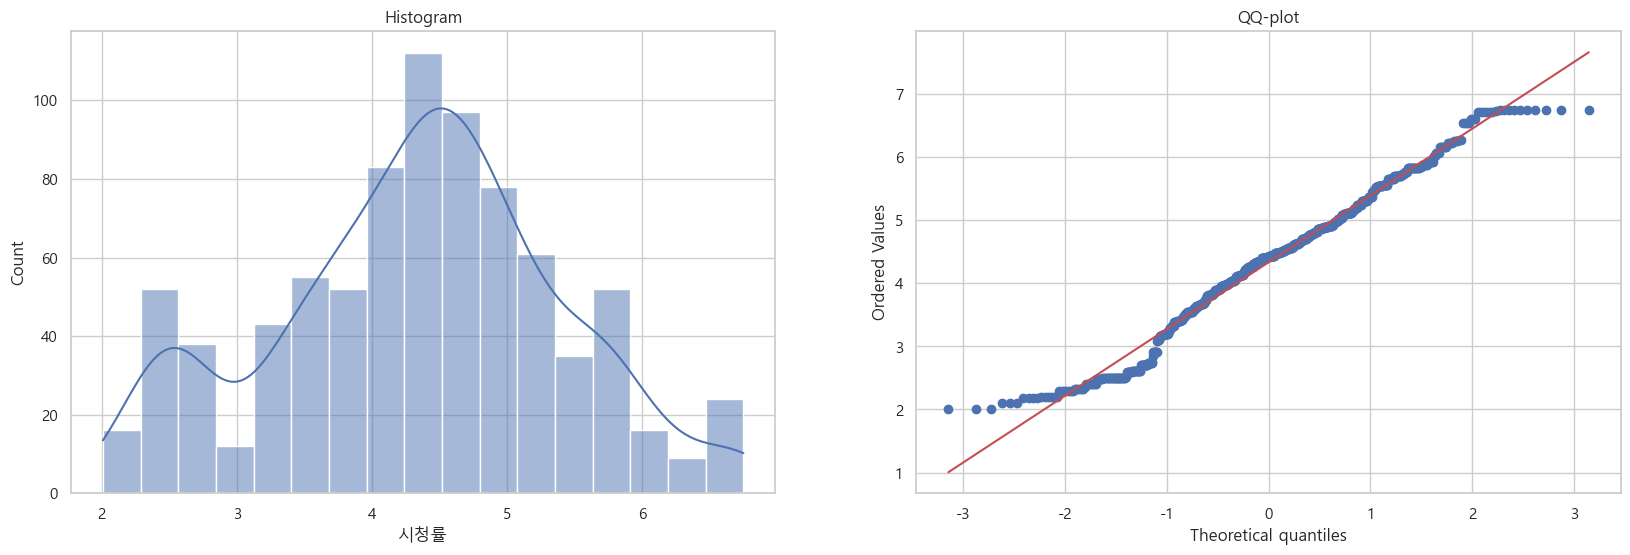

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 히스토그램과 QQ-plot 나란히 그리기
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# 히스토그램
sns.histplot(labelEnco_df['시청률'], kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ-plot
stats.probplot(labelEnco_df['시청률'], plot=axes[1])
axes[1].set_title('QQ-plot')

plt.show()


로그 변환(log transformation)은 데이터의 분포를 조정하여 일부 패턴이나 구조를 더 잘 파악할 수 있도록 하는 일반적인 전처리 기법 중 하나입니다. 여러 분야에서 사용되며, 특히 데이터의 분포가 정규 분포와 유사하게 만들어지도록 하는 경우가 많습니다.

위의 코드에서는 '조회수' 열에 대해 로그 변환을 수행하고, 변환된 데이터에 대한 히스토그램과 QQ-plot을 그려보았습니다.

히스토그램은 데이터의 분포를 시각적으로 확인하는 데 사용됩니다. 로그 변환을 통해 '조회수'의 분포가 어떻게 변경되었는지 확인할 수 있습니다. 만약 로그 변환 전보다 정규 분포에 더 가까워진다면, 모델링이나 통계 분석에서 더 나은 결과를 얻을 수 있을 것입니다.

QQ-plot은 주어진 데이터가 정규 분포를 따르는지 확인하는 데 사용됩니다. QQ-plot에서 데이터가 직선에 가깝게 분포되어 있으면 정규 분포를 따른다고 판단할 수 있습니다. 여기서도 로그 변환 후 QQ-plot이 직선에 가깝게 분포되어 있으면 '조회수' 열이 정규 분포에 가까워졌다고 볼 수 있습니다.

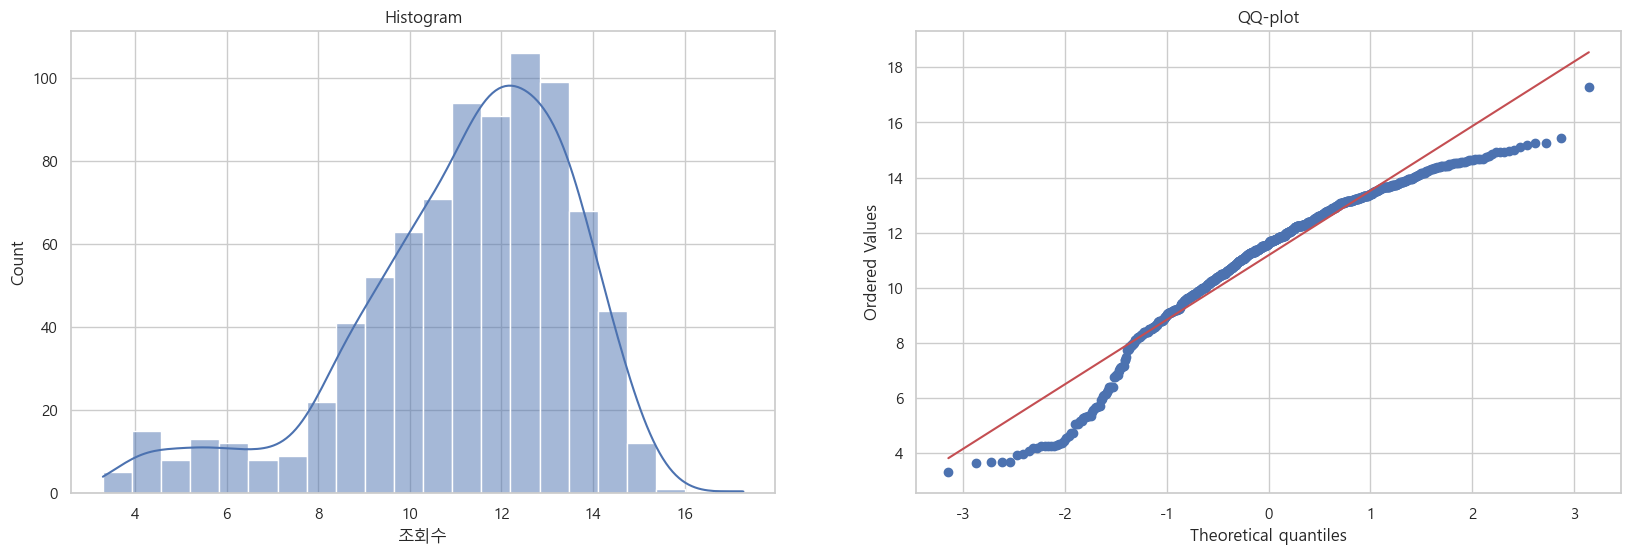

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 로그 변환
log_y = np.log1p(labelEnco_df['조회수'])

# 히스토그램과 QQ-plot 나란히 그리기
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# 히스토그램
sns.histplot(log_y, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ-plot
stats.probplot(log_y, plot=axes[1])
axes[1].set_title('QQ-plot')

plt.show()


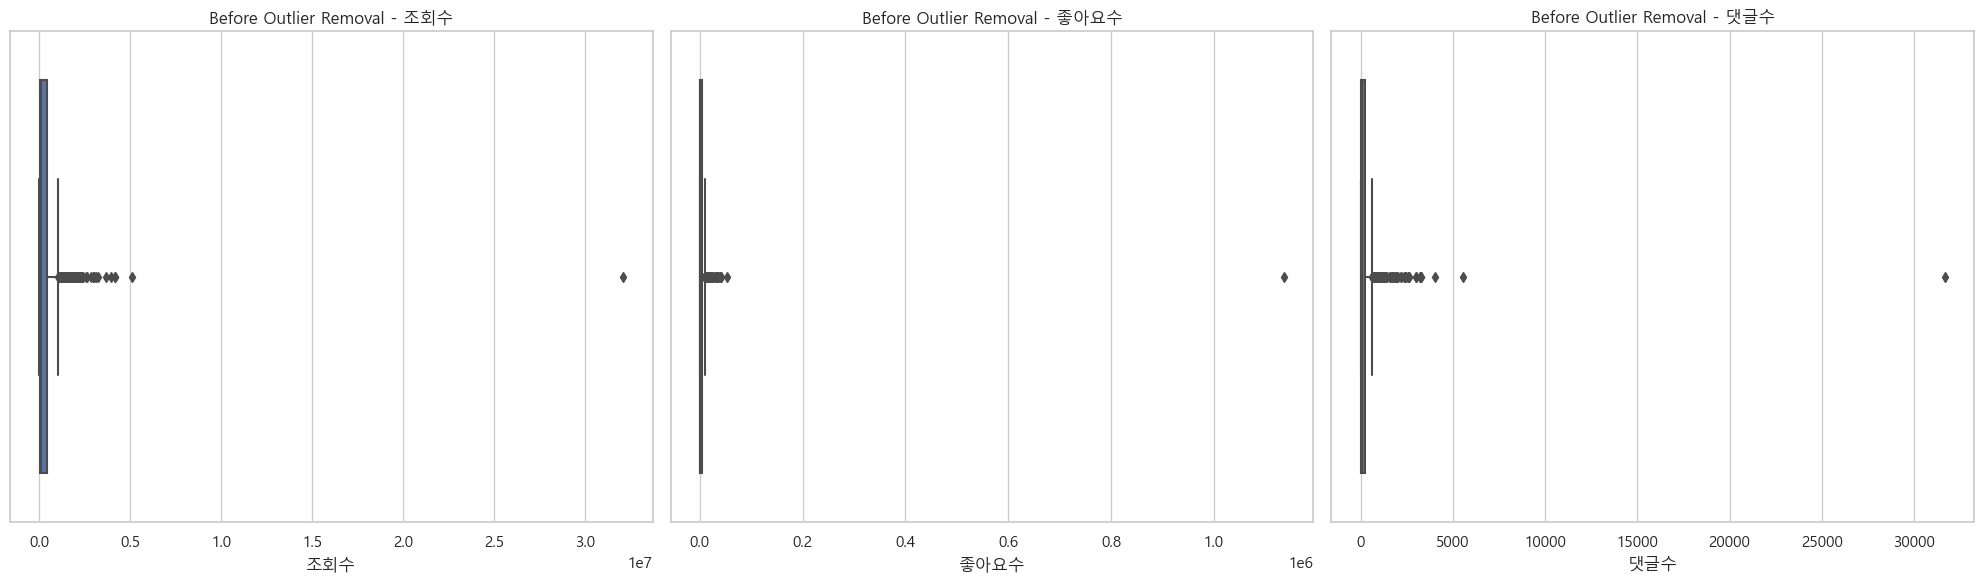

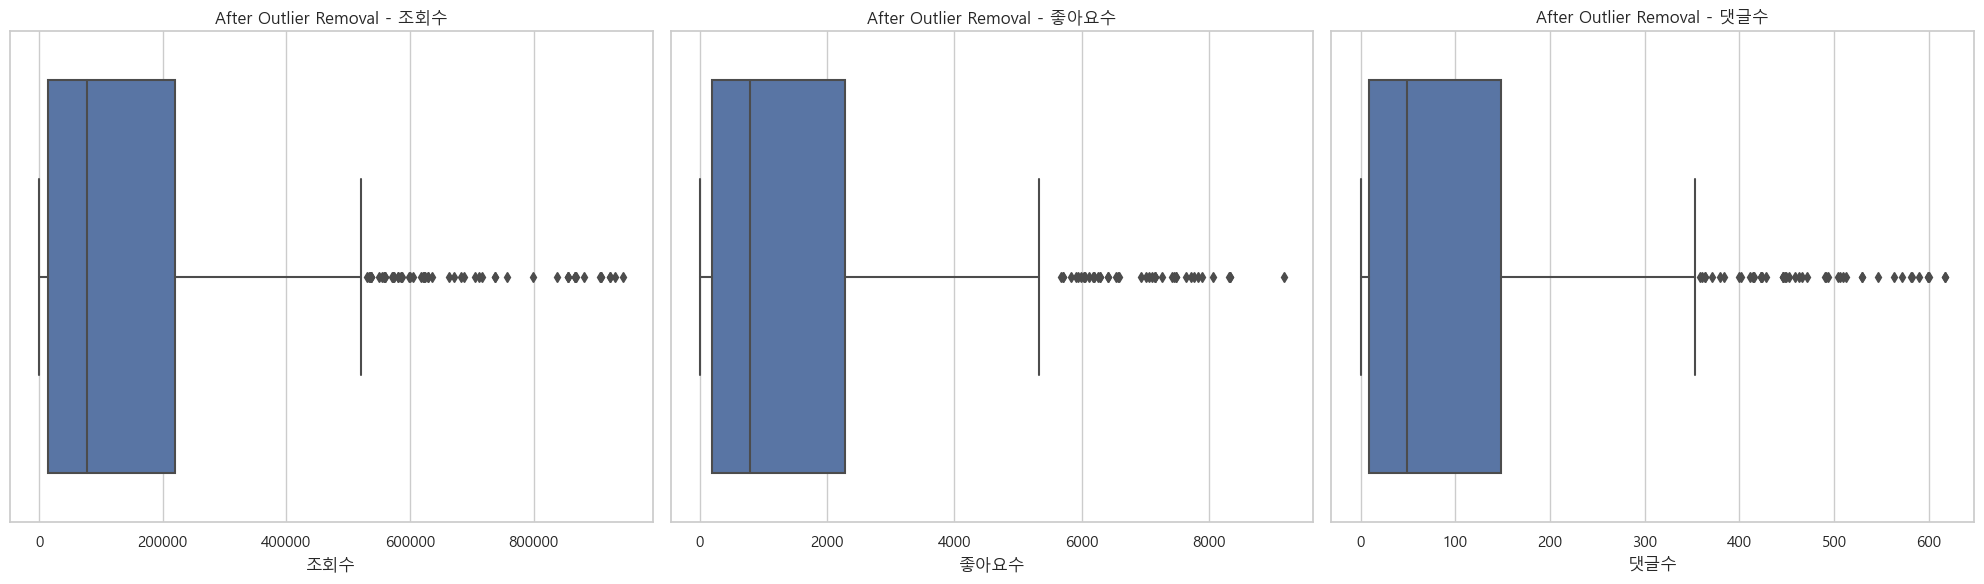

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택된 변수
selected_columns = ['조회수', '좋아요수', '댓글수']

# 이상치 처리 전의 상자 그림
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, column in enumerate(selected_columns):
    sns.boxplot(ax=axes[i], x=labelEnco_df[column])
    axes[i].set_title(f'Before Outlier Removal - {column}')

plt.tight_layout()

# IQR을 사용한 이상치 처리
Q1 = labelEnco_df[selected_columns].quantile(0.25)
Q3 = labelEnco_df[selected_columns].quantile(0.75)
IQR = Q3 - Q1

eda_df_no_outliers = labelEnco_df[~((labelEnco_df[selected_columns] < (Q1 - 1.5 * IQR)) | (labelEnco_df[selected_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 이상치 처리 후의 상자 그림
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, column in enumerate(selected_columns):
    sns.boxplot(ax=axes[i], x=eda_df_no_outliers[column])
    axes[i].set_title(f'After Outlier Removal - {column}')

plt.tight_layout()
plt.show()


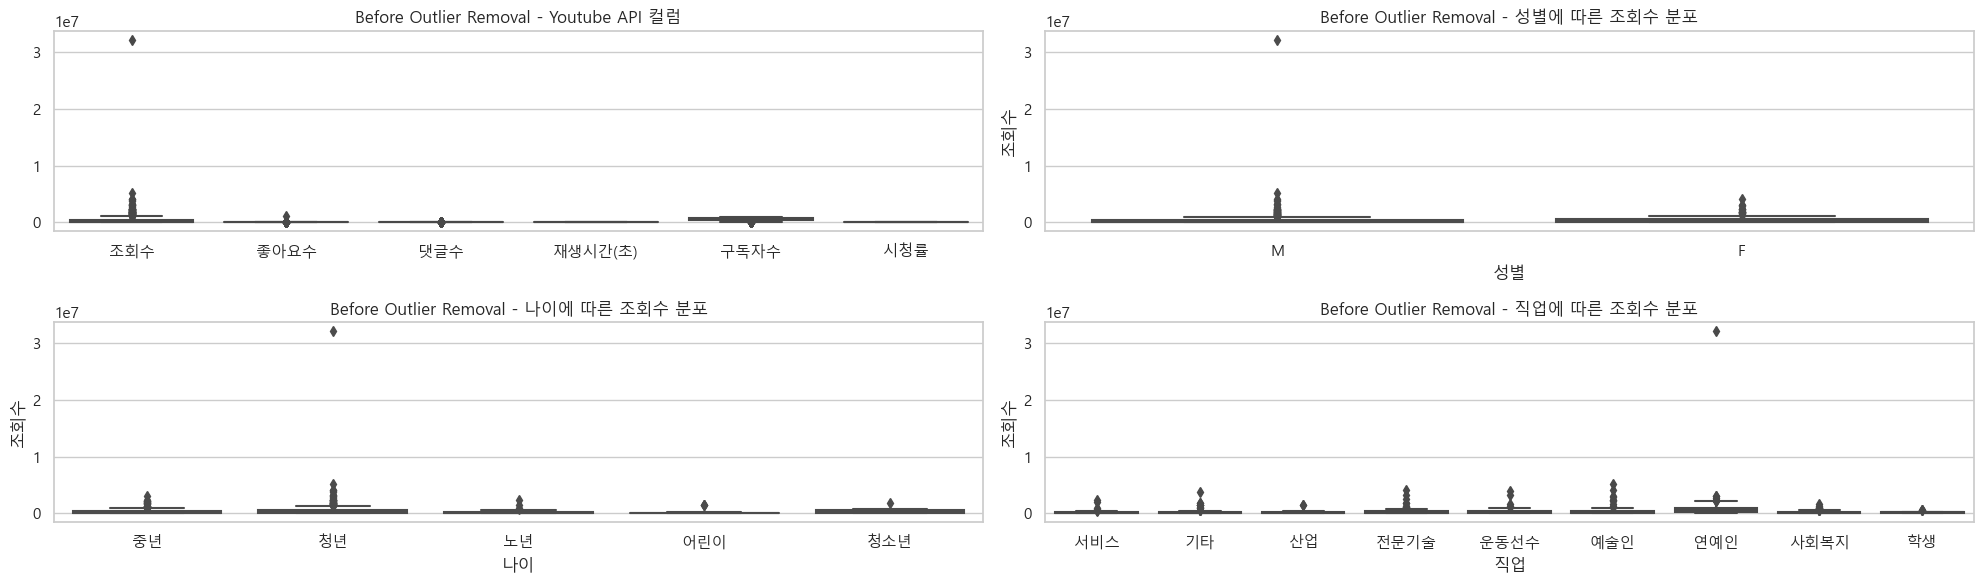

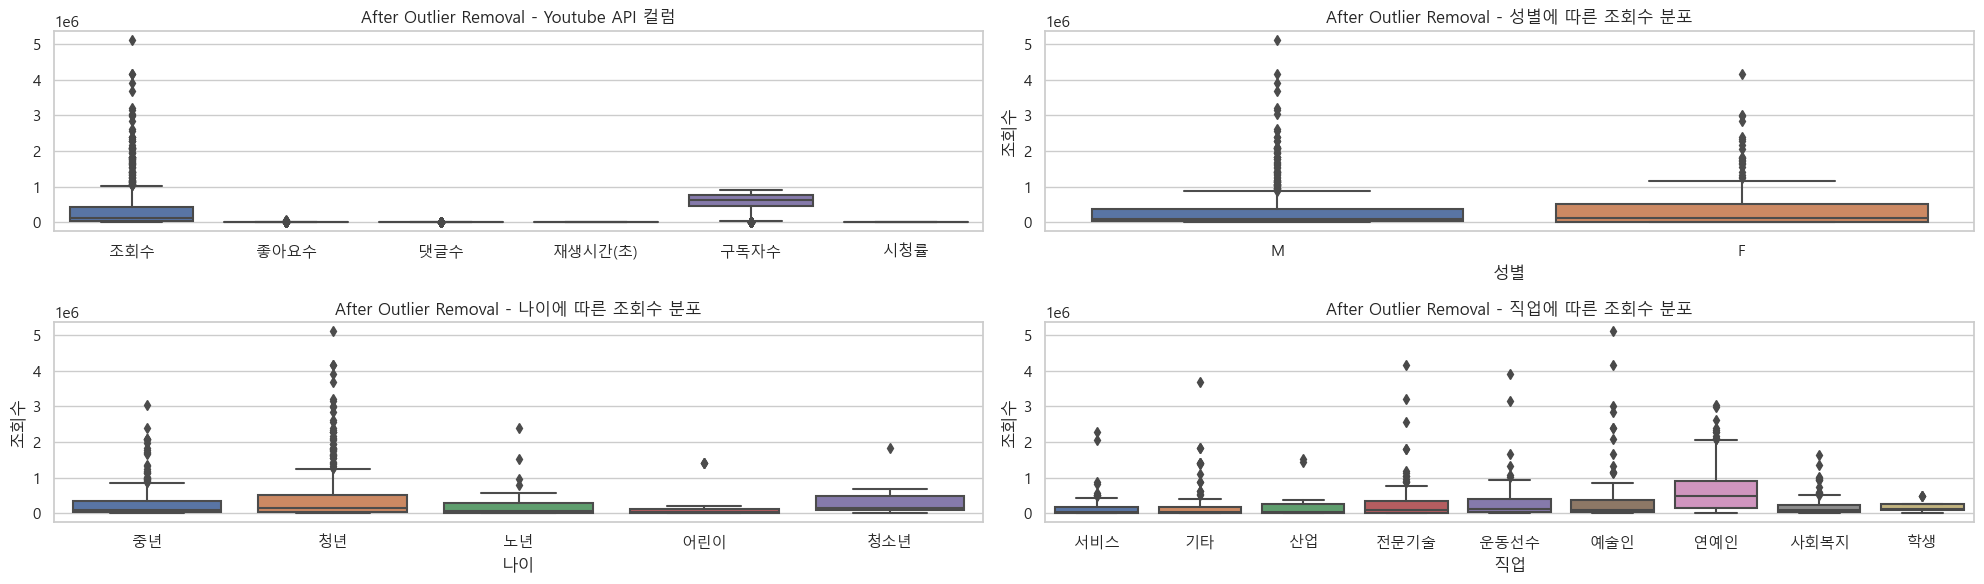

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# '280번 인덱스 row' 삭제한 데이터프레임 정의
edaFin_df = edaDraft_df.drop(index=281)

# 4개의 차트를 한 번에 그리기 위한 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))

# 이상치 삭제 전의 전체 데이터에 대한 박스플롯
sns.boxplot(data=edaDraft_df, ax=axes[0, 0])
axes[0, 0].set_title('Before Outlier Removal - Youtube API 컬럼')

# 이상치 삭제 전의 성별에 따른 조회수 분포
sns.boxplot(x='성별', y='조회수', data=edaDraft_df, ax=axes[0, 1])
axes[0, 1].set_title('Before Outlier Removal - 성별에 따른 조회수 분포')

# 이상치 삭제 전의 나이에 따른 조회수 분포
sns.boxplot(x='나이', y='조회수', data=edaDraft_df, ax=axes[1, 0])
axes[1, 0].set_title('Before Outlier Removal - 나이에 따른 조회수 분포')

# 이상치 삭제 전의 직업에 따른 조회수 분포
sns.boxplot(x='직업', y='조회수', data=edaDraft_df, ax=axes[1, 1])
axes[1, 1].set_title('Before Outlier Removal - 직업에 따른 조회수 분포')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 4개의 차트를 한 번에 그리기 위한 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))

# 이상치 삭제 후의 전체 데이터에 대한 박스플롯
sns.boxplot(data=edaFin_df, ax=axes[0, 0])
axes[0, 0].set_title('After Outlier Removal - Youtube API 컬럼')

# 이상치 삭제 후의 성별에 따른 조회수 분포
sns.boxplot(x='성별', y='조회수', data=edaFin_df, ax=axes[0, 1])
axes[0, 1].set_title('After Outlier Removal - 성별에 따른 조회수 분포')

# 이상치 삭제 후의 나이에 따른 조회수 분포
sns.boxplot(x='나이', y='조회수', data=edaFin_df, ax=axes[1, 0])
axes[1, 0].set_title('After Outlier Removal - 나이에 따른 조회수 분포')

# 이상치 삭제 후의 직업에 따른 조회수 분포
sns.boxplot(x='직업', y='조회수', data=edaFin_df, ax=axes[1, 1])
axes[1, 1].set_title('After Outlier Removal - 직업에 따른 조회수 분포')

# 레이아웃 조정
plt.tight_layout()
plt.show()


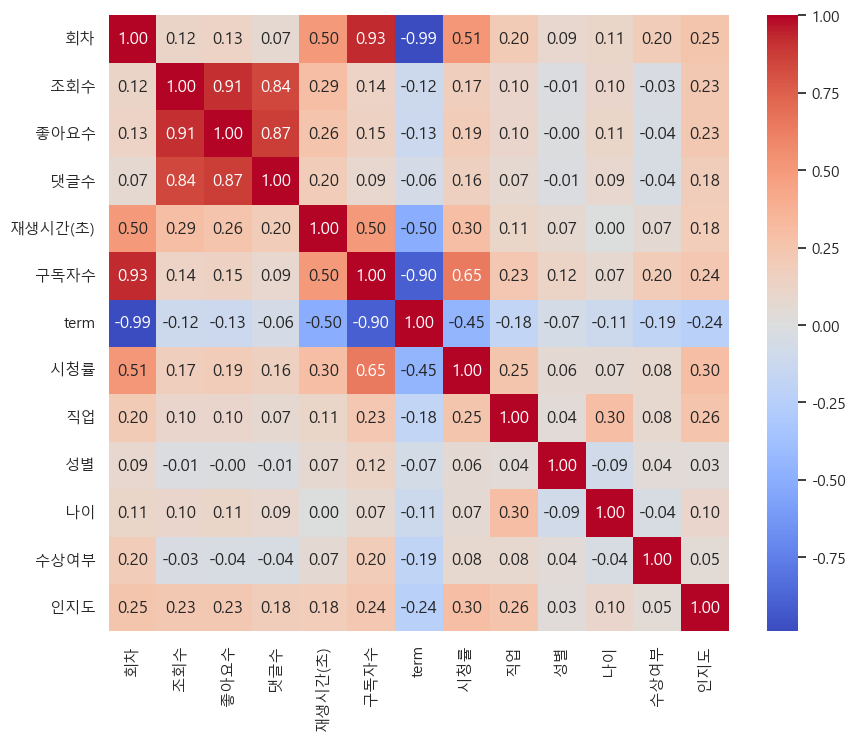

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# 날짜 열을 제거한 데이터프레임 생성
eda_df_no_date = eda_df.drop(['날짜'], axis=1)

# 상관 행렬 생성
correlation_matrix = eda_df_no_date.corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


회차별 시청률

Text(0.5, 1.0, '회차별 시청률')

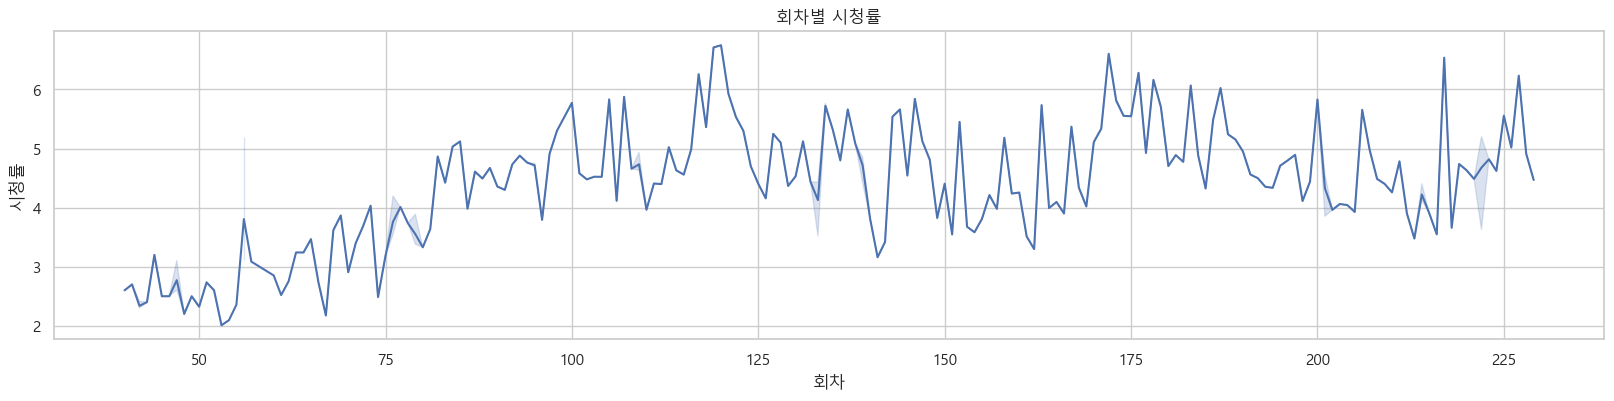

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 4))
sns.lineplot(x='회차', y='시청률', data=eda_df)
plt.title('회차별 시청률')

직업별 조회수

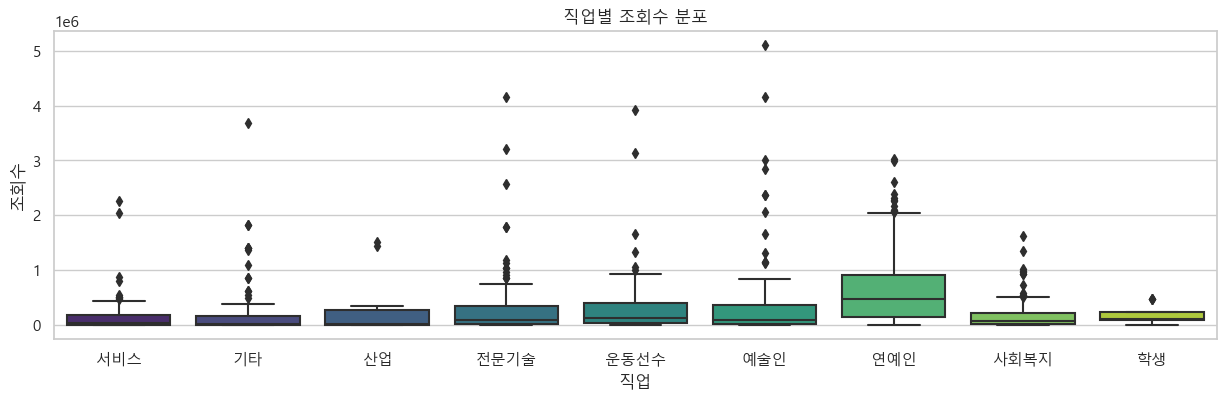

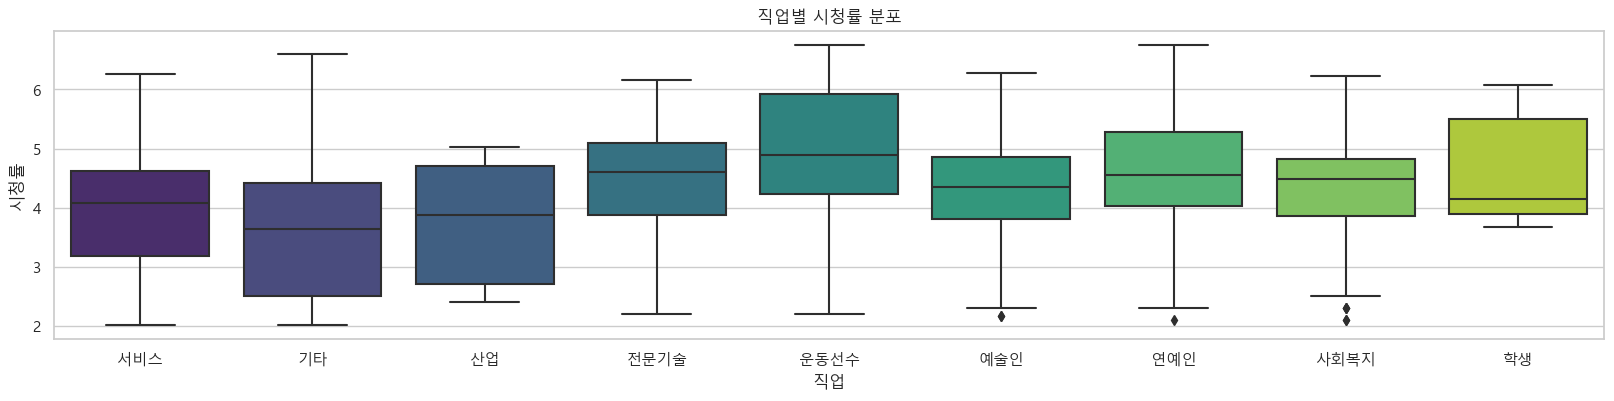

In [199]:
# 직업별 조회수와 시청률의 상자 그림
plt.figure(figsize=(15, 4))
sns.boxplot(x='직업', y='조회수', data=edaFin_df, palette='viridis')
plt.title('직업별 조회수 분포')
# plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(20, 4))
sns.boxplot(x='직업', y='시청률', data=edaFin_df, palette='viridis')
plt.title('직업별 시청률 분포')
# plt.xticks(rotation=45, ha='right')
plt.show()


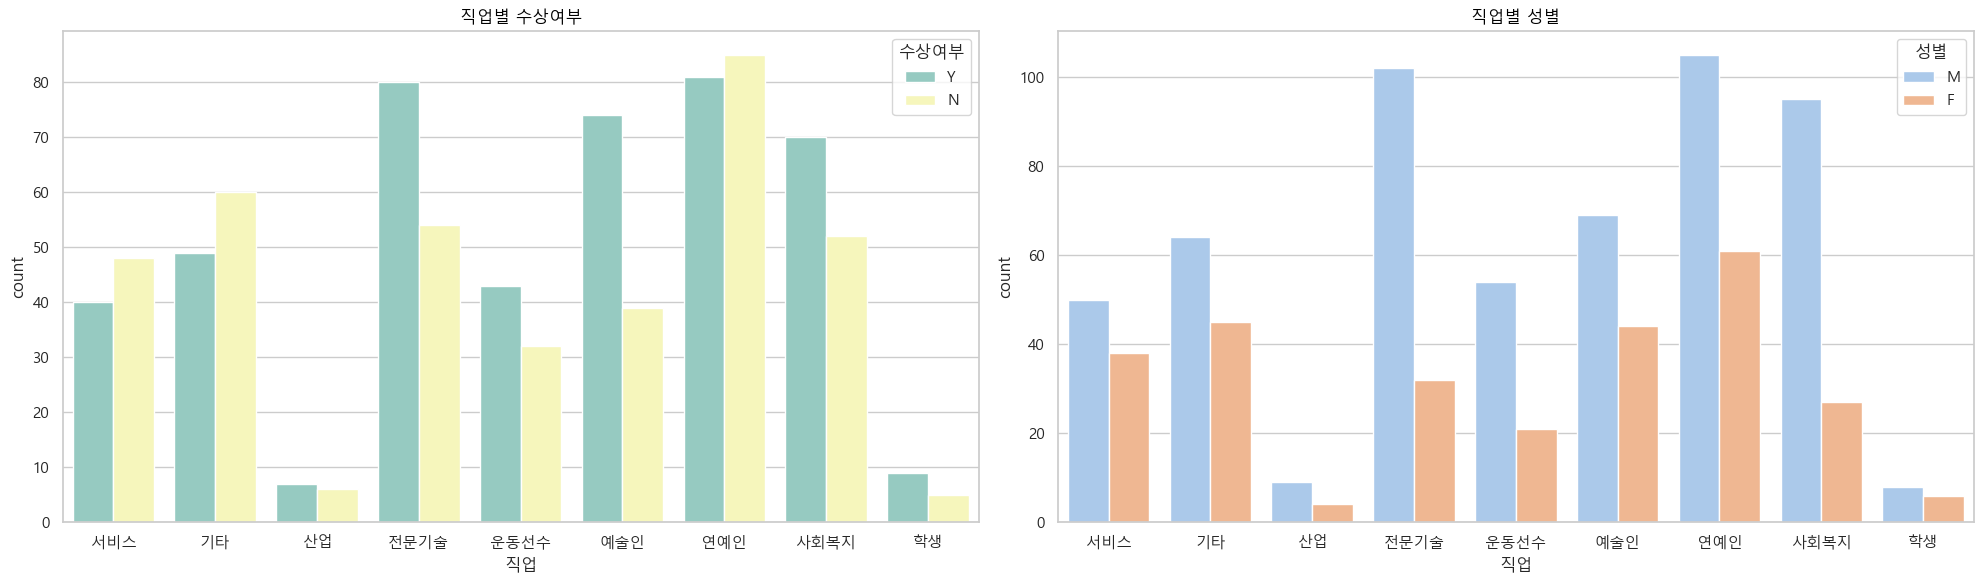

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 전체 크기 설정
plt.figure(figsize=(20, 6))

# 수상여부 - Countplot
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='직업', hue='수상여부', data=edaFin_df, palette="Set3")
plt.title('직업별 수상여부')  # 타이틀 색상을 지정하지 않음

# 성별 - Barplot
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='직업', hue='성별', data=edaFin_df, palette="pastel")
plt.title('직업별 성별')  # 타이틀 색상을 지정하지 않음

# 타이틀 색상 개별적으로 설정
ax1.title.set_color('black')
ax2.title.set_color('black')

# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 그래프들 간의 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()


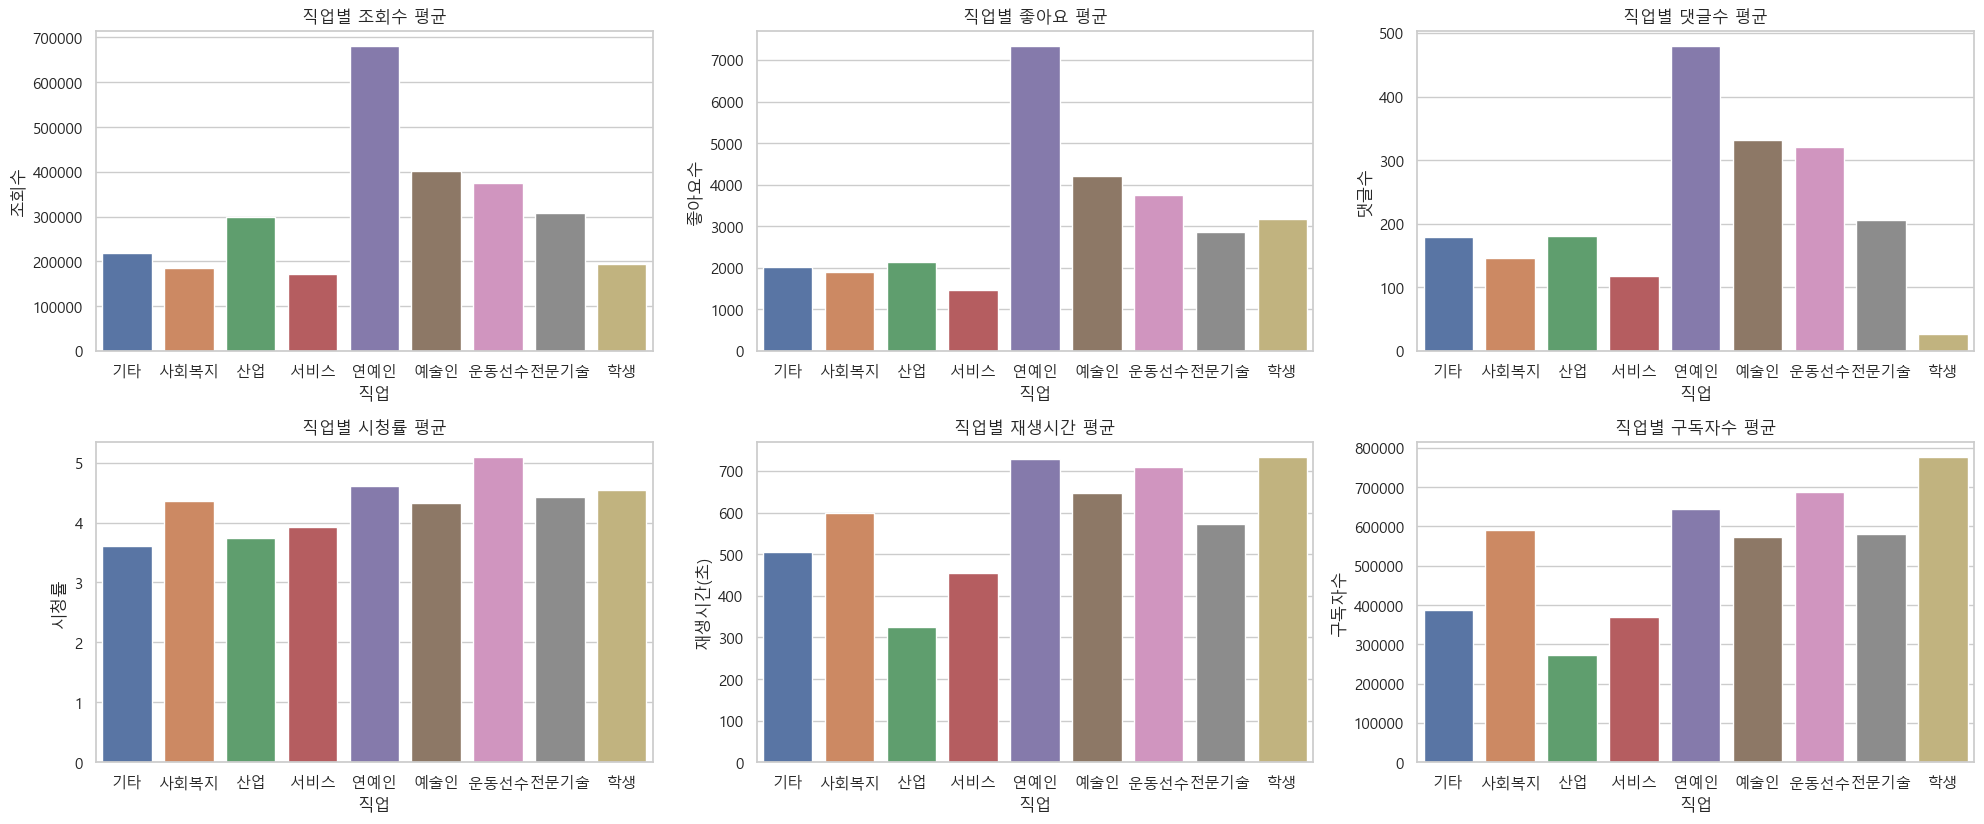

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# 나눔 폰트 설치되어 있다면
plt.rcParams['font.family'] = 'NanumGothic'

# 나눔 폰트가 설치되어 있지 않다면 다른 폰트로 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우
# plt.rcParams['font.family'] = 'AppleGothic'  # 맥

# 직업별로 조회수, 좋아요수, 댓글수, 시청률, 재생시간, 구독자수의 평균 계산
average_metrics = edaFin_df.groupby('직업').agg({
    '조회수': 'mean',
    '좋아요수': 'mean',
    '댓글수': 'mean',
    '시청률': 'mean',
    '재생시간(초)': 'mean',
    '구독자수': 'mean'
}).reset_index()

# 그래프의 전체 크기 설정
plt.figure(figsize=(20, 12))

# 조회수 - Barplot
plt.subplot(3, 3, 1)
sns.barplot(x='직업', y='조회수', data=average_metrics)
plt.title('직업별 조회수 평균')

# 좋아요 - Barplot
plt.subplot(3, 3, 2)
sns.barplot(x='직업', y='좋아요수', data=average_metrics)
plt.title('직업별 좋아요 평균')

# 댓글수 - Barplot
plt.subplot(3, 3, 3)
sns.barplot(x='직업', y='댓글수', data=average_metrics)
plt.title('직업별 댓글수 평균')

# 시청률 - Barplot
plt.subplot(3, 3, 4)
sns.barplot(x='직업', y='시청률', data=average_metrics)
plt.title('직업별 시청률 평균')

# 재생시간 - Lineplot
plt.subplot(3, 3, 5)
sns.barplot(x='직업', y='재생시간(초)', data=average_metrics)
plt.title('직업별 재생시간 평균')

# 구독자수 - Lineplot
plt.subplot(3, 3, 6)
sns.barplot(x='직업', y='구독자수', data=average_metrics)
plt.title('직업별 구독자수 평균')

# 그래프들 간의 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()


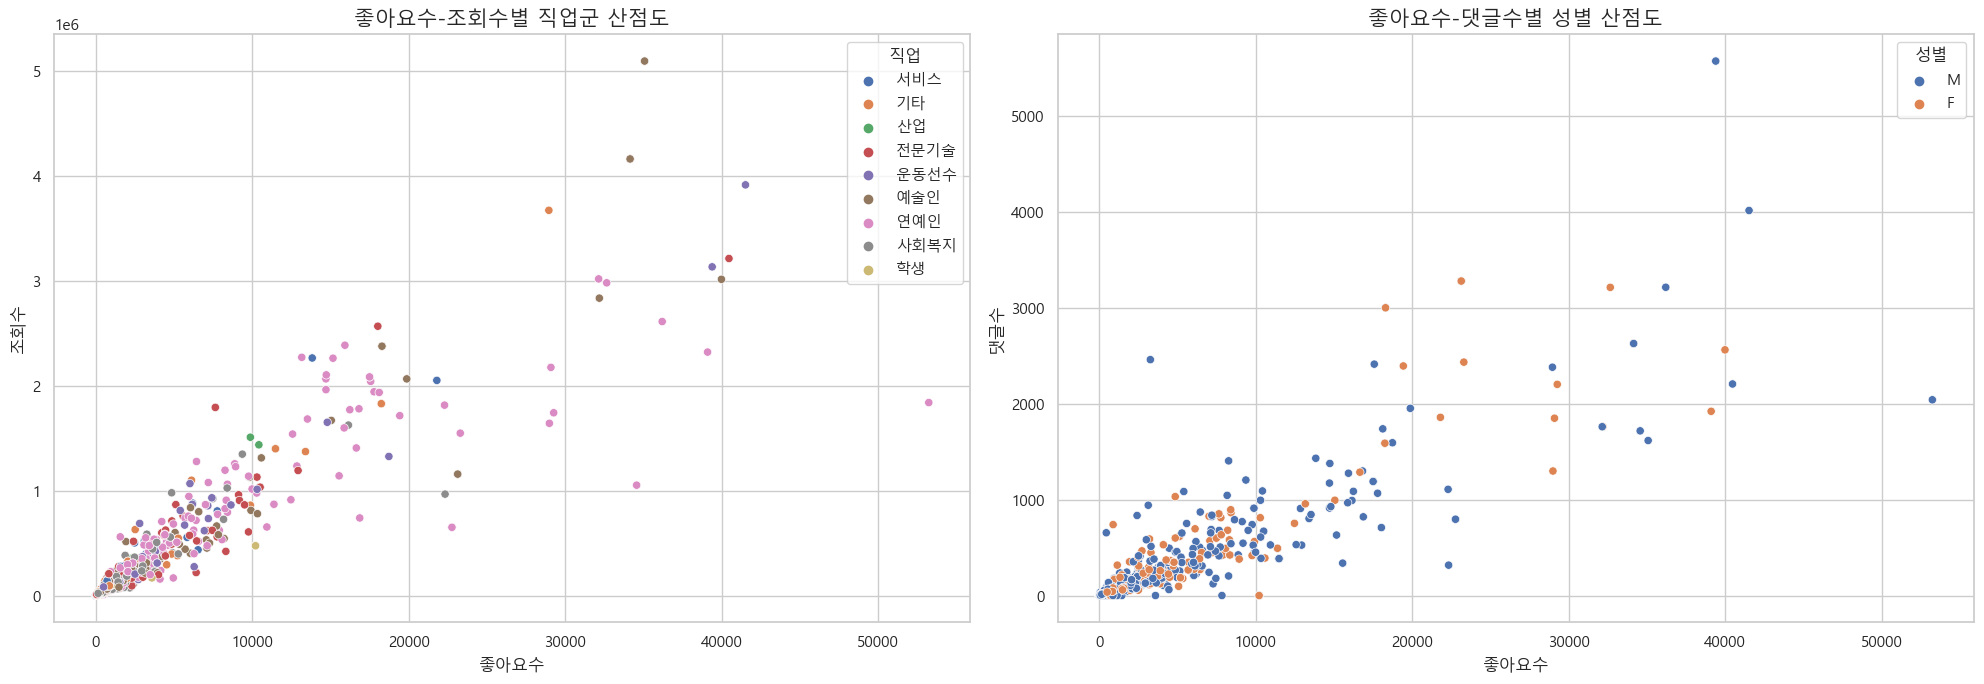

In [184]:
plt.figure(figsize=(20, 7))

# 첫 번째 서브플롯 (좋아요수-조회수별 직업군 산점도)
plt.subplot(1, 2, 1)
sns.scatterplot(data=edaFin_df, x='좋아요수', y='조회수', hue='직업')
plt.title('좋아요수-조회수별 직업군 산점도', fontsize=15)

# 두 번째 서브플롯 (좋아요수-댓글수별 성별 산점도)
plt.subplot(1, 2, 2)
sns.scatterplot(data=edaFin_df, x='좋아요수', y='댓글수', hue='성별')
plt.title('좋아요수-댓글수별 성별 산점도', fontsize=15)

# 레이아웃 조정
plt.tight_layout()
plt.show()


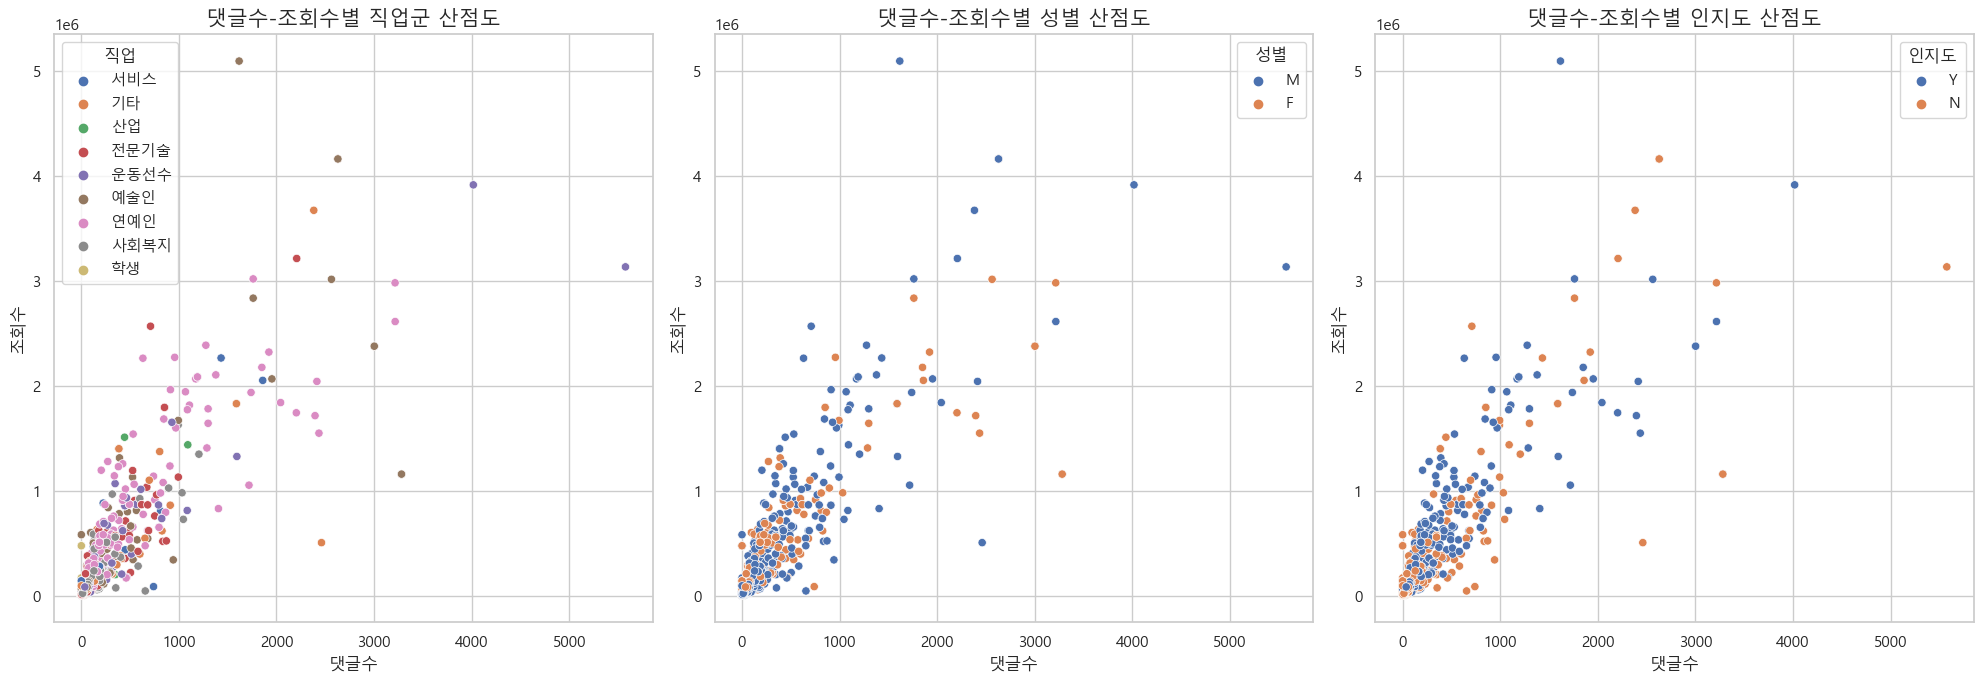

In [185]:
plt.figure(figsize=(20, 7))

# 댓글수-조회수별 직업군 산점도
plt.subplot(1, 3, 1)
sns.scatterplot(data=edaFin_df, x='댓글수', y='조회수', hue='직업')
plt.title('댓글수-조회수별 직업군 산점도', fontsize=15)

# 댓글수-조회수별 성별 산점도
plt.subplot(1, 3, 2)
sns.scatterplot(data=edaFin_df, x='댓글수', y='조회수', hue='성별')
plt.title('댓글수-조회수별 성별 산점도', fontsize=15)

# 댓글수-조회수별 인지도 산점도
plt.subplot(1, 3, 3)
sns.scatterplot(data=edaFin_df, x='댓글수', y='조회수', hue='인지도')
plt.title('댓글수-조회수별 인지도 산점도', fontsize=15)

plt.tight_layout()
plt.show()


------

### 날짜별

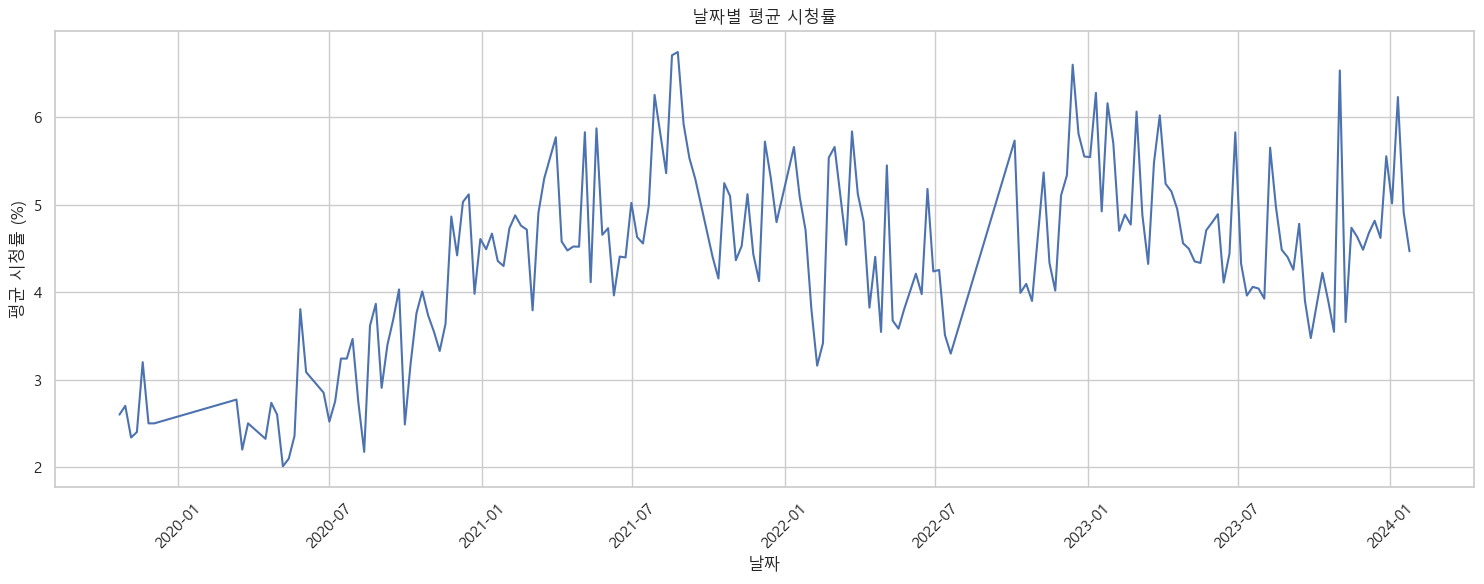

In [188]:
# 날짜별 시청률 시각화를 위해 필요한 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
import seaborn as sns

# '날짜' 컬럼을 datetime 타입으로 변환합니다.
edaFin_df['날짜'] = pd.to_datetime(edaFin_df['날짜'])

# 날짜별로 시청률의 평균을 계산합니다.
date_viewership = edaFin_df.groupby('날짜')['시청률'].mean().reset_index()

# 시청률을 날짜별로 시각화합니다.
plt.figure(figsize=(15, 6))
sns.lineplot(x='날짜', y='시청률', data=date_viewership)
plt.title('날짜별 평균 시청률')
plt.xlabel('날짜')
plt.ylabel('평균 시청률 (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프를 표시합니다.
plt.show()

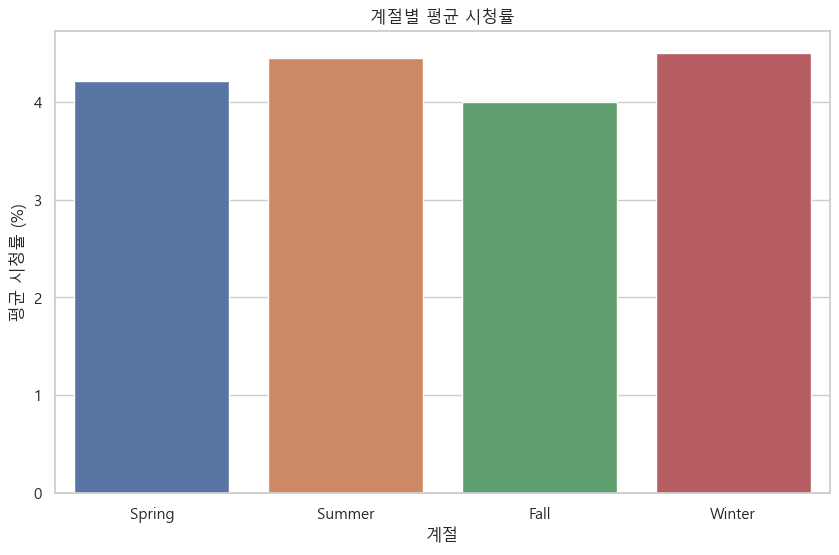

In [189]:
# 계절을 매핑하는 함수를 정의합니다.
def map_season(month):
    if month in [11, 12, 1, 2]:  # 겨울
        return 'Winter'
    elif month in [3, 4, 5]:  # 봄
        return 'Spring'
    elif month in [6, 7, 8]:  # 여름
        return 'Summer'
    else:
        return 'Fall'  # 가을

# '날짜' 컬럼에서 월을 추출하고, 이를 사용하여 계절 컬럼을 생성합니다.
edaFin_df['Season'] = edaFin_df['날짜'].dt.month.apply(map_season)

# 계절별로 시청률의 평균을 계산합니다.
season_viewership = edaFin_df.groupby('Season')['시청률'].mean().reset_index()

# 계절별 시청률을 시각화합니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='시청률', data=season_viewership, order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('계절별 평균 시청률')
plt.xlabel('계절')
plt.ylabel('평균 시청률 (%)')

# 그래프를 표시합니다.
plt.show()

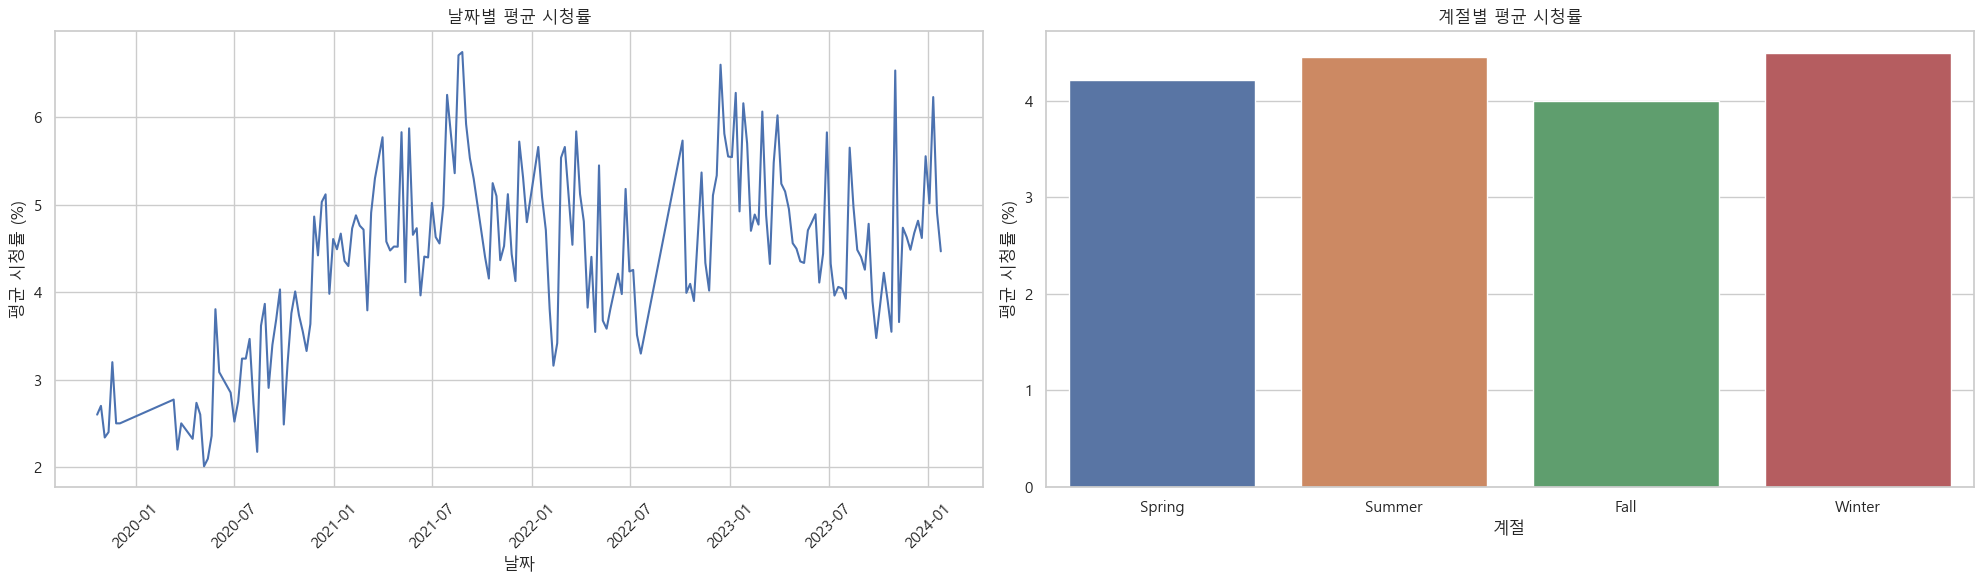

In [190]:
# 두 개의 시각화(날짜별 평균 시청률 및 계절별 평균 시청률)를 나란히 표시하기 위한 코드를 작성합니다.

# 날짜별 평균 시청률 데이터 준비
date_viewership = edaFin_df.groupby('날짜')['시청률'].mean().reset_index()

# 계절별 평균 시청률 데이터 준비 (이전에 이미 계산함)

# 시각화
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# 날짜별 평균 시청률 시각화
sns.lineplot(x='날짜', y='시청률', data=date_viewership, ax=axs[0])
axs[0].set_title('날짜별 평균 시청률')
axs[0].set_xlabel('날짜')
axs[0].set_ylabel('평균 시청률 (%)')
axs[0].tick_params(axis='x', rotation=45)

# 계절별 평균 시청률 시각화
sns.barplot(x='Season', y='시청률', data=season_viewership, order=['Spring', 'Summer', 'Fall', 'Winter'], ax=axs[1])
axs[1].set_title('계절별 평균 시청률')
axs[1].set_xlabel('계절')
axs[1].set_ylabel('평균 시청률 (%)')

plt.tight_layout()
plt.show()